In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F

In [2]:
x = torch.tensor([[1, 2], [5,6], [1,4], [6,10]]).float()
y = torch.tensor([1, 6, 6, 1]).float()

In [3]:
m1 = nn.Linear(x.shape[1], 8, bias = False)
m1.weight

Parameter containing:
tensor([[-0.4372, -0.2673],
        [ 0.1283,  0.4099],
        [-0.2584, -0.6839],
        [ 0.4687, -0.4776],
        [ 0.3518, -0.3385],
        [ 0.4593, -0.3109],
        [ 0.3105, -0.3533],
        [ 0.0894,  0.5536]], requires_grad=True)

In [4]:
a = torch.tensor([2,4]).float()
m1(a) #example

tensor([-1.9435,  1.8961, -3.2523, -0.9730, -0.6504, -0.3252, -0.7922,  2.3933],
       grad_fn=<SqueezeBackward4>)

In [5]:
m2 = nn.Linear(8, 1, bias = False)

In [6]:
m2(m1(x)).flatten() #Our initial preds

tensor([-0.5307, -1.9976, -0.8587, -2.8563], grad_fn=<ViewBackward0>)

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.W1 = nn.Linear(2, 8, bias = False)
        self.W2 = nn.Linear(8, 1, bias = False)

    def forward(self, x):
        x = self.W2(self.W1(x))
        return x.flatten()

In [8]:
net = Net()
y_pred = net.forward(x)

In [9]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.2703,  0.5650],
        [ 0.5402,  0.5253],
        [-0.5799, -0.0301],
        [ 0.2937, -0.4334],
        [ 0.1808, -0.1734],
        [ 0.5064, -0.4860],
        [ 0.4886,  0.3153],
        [ 0.4069, -0.3986]], requires_grad=True)
Parameter containing:
tensor([[ 0.2112,  0.2771,  0.2714, -0.1731,  0.2921,  0.0576, -0.0760,  0.0412]],
       requires_grad=True)


In [10]:
Loss = nn.MSELoss()
Loss(y, y_pred)

tensor(13.2637, grad_fn=<MseLossBackward0>)

In [11]:
opt = SGD(net.parameters(), lr = 0.005)

Text(0, 0.5, 'MSE loss')

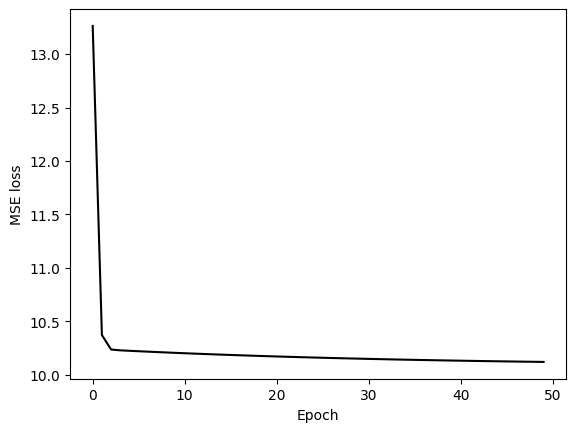

In [12]:
import matplotlib.pyplot as plt
losses = []
epochs = 50

for _ in range(epochs):
    opt.zero_grad() #Reset grads
    loss_val = Loss(net(x), y)
    loss_val.backward()
    opt.step()
    losses.append(loss_val.item())

plt.plot(np.arange(epochs), losses, "k")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")